# Example Analysis with Machine Learning Toolkit - Decision Tree - Airlines Data

## Importing Packages and functions

In [1]:
from utils.LoggerUtils import config_logger, message_debug, message_info, message_warning
from utils.PreProcessUtils import Data_Prep,Data_Prep_Selector,Data_Prep_NA_values,Data_Prep_label_encoder,Data_Prep_One_Hot_Encoder,Data_Prep_standard_scaler,Data_Prep_Outliers,Data_Prep_Unbalanced,Data_Prep_feature_selection
from utils.ClassificationUtils import Data_decision_tree,Data_svm,Data_neural_network,cross_validation_eval,GrindSearch_optmization
from docopt import docopt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import logging
import pickle

## Loading Data and seeing balance in meta variable

<AxesSubplot:xlabel='Delay', ylabel='count'>

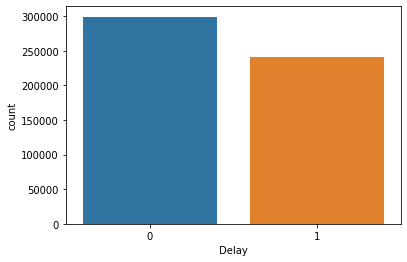

In [2]:
config_logger(logging.INFO)
airlines = pd.read_csv('/workspaces/ml_toolkit/analysis/Airlines.csv')
sns.countplot(x = airlines['Delay'])

In [3]:
airlines.shape

(539383, 9)

## Separating variables from meta

In [4]:
x_airlines = airlines.iloc[:,1:8]
y_airlines = airlines.iloc[:,8].values

## Splitting categorical and numerical data

In [5]:
x_airlines_numerical_columns,x_airlines_categorical_columns = Data_Prep_Selector(x_airlines)
x_airlines_numerical = x_airlines[x_airlines_numerical_columns]
x_airlines_categorical = x_airlines[x_airlines_categorical_columns]

2022-07-31 16:40:30,102 - ML_toolkit - INFO - Initiating Selector function to separate categorical and numerical variables.
2022-07-31 16:40:30,104 - ML_toolkit - INFO - Separated types of variables


### Executing label encoder

In [6]:
x_airlines_categorical_array = x_airlines_categorical.values
x_airlines_categorical_array = Data_Prep_label_encoder(x_airlines_categorical_array)

2022-07-31 16:40:32,296 - ML_toolkit - INFO - Aplying label encoder function...


### Executing Scaler

In [7]:
x_airlines_numerical_array = x_airlines_numerical.values
x_airlines_numerical_array = Data_Prep_standard_scaler(x_airlines_numerical_array)

2022-07-31 16:40:34,358 - ML_toolkit - INFO - Processing variables with standard scaler...
2022-07-31 16:40:34,408 - ML_toolkit - INFO - Standard Scaler process finished!


### Merging numpy arrays

In [8]:
x_airlines_concat = np.concatenate([x_airlines_numerical_array,x_airlines_categorical_array],axis=1)

## Evaluate importance from variables (Using ExtraTrees)

In [9]:
relevance = Data_Prep_feature_selection(x_airlines_concat,y_airlines)

In [10]:
relevance ## Columns "AirportFrom" and "AirportTo" less relevant than the others, so will be removed

array([0.14003854, 0.19327044, 0.21860695, 0.15353103, 0.12306053,
       0.08827505, 0.08321747])

## Going back to original x_dataframe and removing "AirportFrom" and "AirportTo" columns

In [11]:
x_airlines_optimized = x_airlines.drop(columns=["AirportFrom","AirportTo"]) 


## Preprocessing data for missing values, standard scaler, label encoder and one hot encoder

In [12]:
%%time
x_airlines_preprocess = Data_Prep(x_airlines_optimized)

2022-07-31 16:43:22,570 - ML_toolkit - INFO - Not detected missing values in column.
2022-07-31 16:43:22,573 - ML_toolkit - INFO - Not detected missing values in column.
2022-07-31 16:43:22,577 - ML_toolkit - INFO - Not detected missing values in column.
2022-07-31 16:43:22,580 - ML_toolkit - INFO - Not detected missing values in column.
2022-07-31 16:43:22,583 - ML_toolkit - INFO - Not detected missing values in column.
2022-07-31 16:43:22,585 - ML_toolkit - INFO - Missing values checked sucessfully.
2022-07-31 16:43:22,586 - ML_toolkit - INFO - Initiating Selector function to separate categorical and numerical variables.
2022-07-31 16:43:22,589 - ML_toolkit - INFO - Separated types of variables
2022-07-31 16:43:22,590 - ML_toolkit - INFO - Found both categorical and numerical values. Spliting dataframe
2022-07-31 16:43:22,607 - ML_toolkit - INFO - Calling label encoder function
2022-07-31 16:43:22,608 - ML_toolkit - INFO - Aplying label encoder function...
2022-07-31 16:43:22,726 - M

In [13]:
x_airlines_preprocess.shape

(539383, 22)

In [14]:
y_airlines = y_airlines.reshape(-1,1)

## Measuring performace - Using Decision Tree

### Using GrindSearch for optimal feature selection

In [15]:
%%time
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}
optm = GrindSearch_optmization("decision_tree",parameters,x_airlines_preprocess,y_airlines)

2022-07-31 16:43:59,150 - ML_toolkit - INFO - Checking for optimal parameters...
2022-07-31 16:52:12,025 - ML_toolkit - INFO - Optimal parameters found sucessfully: ({'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}, 0.6358876203534433)
CPU times: user 8min 8s, sys: 3.56 s, total: 8min 11s
Wall time: 8min 12s


### Applying decision tree model with optimized features

In [17]:
eval = cross_validation_eval("decision_tree", 30, 10,x_airlines_preprocess,y_airlines,optm[0])
build_model = eval[1]
eval[0]

2022-07-31 16:54:13,524 - ML_toolkit - INFO - Cross-validation evaluation initiated...
2022-07-31 16:54:13,527 - ML_toolkit - INFO - Cross-validation loop: 0
2022-07-31 16:54:36,371 - ML_toolkit - INFO - Cross-validation loop: 1
2022-07-31 16:54:59,113 - ML_toolkit - INFO - Cross-validation loop: 2
2022-07-31 16:55:21,566 - ML_toolkit - INFO - Cross-validation loop: 3
2022-07-31 16:55:44,077 - ML_toolkit - INFO - Cross-validation loop: 4
2022-07-31 16:56:06,265 - ML_toolkit - INFO - Cross-validation loop: 5
2022-07-31 16:56:29,571 - ML_toolkit - INFO - Cross-validation loop: 6
2022-07-31 16:56:52,163 - ML_toolkit - INFO - Cross-validation loop: 7
2022-07-31 16:57:14,655 - ML_toolkit - INFO - Cross-validation loop: 8
2022-07-31 16:57:37,847 - ML_toolkit - INFO - Cross-validation loop: 9
2022-07-31 16:58:00,500 - ML_toolkit - INFO - Cross-validation loop: 10
2022-07-31 16:58:23,274 - ML_toolkit - INFO - Cross-validation loop: 11
2022-07-31 16:58:46,370 - ML_toolkit - INFO - Cross-validat

[0.6095334798757592,
 0.6091348872678634,
 0.6092220124929104,
 0.6089049944768952,
 0.6095019671568641,
 0.6089253876436602,
 0.6090996563795518,
 0.6091330298158154,
 0.6087381307671279,
 0.6091608398669754,
 0.6092702264348366,
 0.6088197065276497,
 0.6094741631207693,
 0.609082973717292,
 0.6088512340951621,
 0.6095019647508383,
 0.6093536438363787,
 0.6091979172771026,
 0.6088808949302408,
 0.6087288545058642,
 0.6090699902512158,
 0.6099024318248227,
 0.6088401065000311,
 0.6090013980598855,
 0.6089884253865544,
 0.608563853541402,
 0.6095612917142527,
 0.6092906192578837,
 0.6092961763529484,
 0.6095427600210361]

## Saving Trained Model

In [18]:
pickle.dump(build_model, open('/workspaces/ml_toolkit/analysis/airlines-decision_tree.sav', 'wb'))